In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

In [2]:
stud = pd.read_csv('stud_math.csv')

In [3]:
def analiz(n):
    """Функция находит медиану процентили, IQR,  и строит график распределения"""

    IQR = stud[n].quantile(0.75) - stud[n].quantile(0.25)
    perc25 = stud[n].quantile(0.25)
    perc75 = stud[n].quantile(0.75)
    print(
        '25-й перцентиль: {},'.format(perc25),
        '75-й перцентиль: {},'.format(perc75),
        "IQR: {}, ".format(IQR),
        "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
    return stud[n].describe(), stud[n].hist()


def func_IQR(col):
    """Функция строит график распределения без выбросов"""
    IQR = stud[col].quantile(0.75) - stud[col].quantile(0.25)
    perc25 = stud[col].quantile(0.25)
    perc75 = stud[col].quantile(0.75)
    low = stud[col].min()-0.5
    high = stud[col].max()+0.5
    stud[col].loc[stud[col].between(
        perc25 - 1.5*IQR,
        perc75 + 1.5*IQR)].hist(range=(perc25 - 1.5*IQR, perc75 + 1.5*IQR), label='IQR')
    return


def get_boxplot(column):
    """Функция строит графики для номинативных столбцов"""
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=stud,
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    return


def get_stat_dif(column):
    """ Функция тест Стьюдента"""
    cols = stud.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'],
                     stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break


def unic(data):
    """ Функция выводит уникальные значения в столбцах датасета"""
    for column in data:
        print(column, data[column].unique())
        return


def spread(data):
    """Функция выводит количество незаполненных значений в каждом числовом столбце и количество уникальных значений во всех столбцах:"""
    for column in data:
        print(pd.DataFrame(data[column].value_counts()),
              'nan =', data[column].isna().sum())
    return

In [4]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [5]:
# Наш DataFrame  содержит 13 числовых столбцов и 17 object. Полностью заполнены только 3 столбца: school,sex,age
# Проанализируем для начала числовые столбцы:

In [6]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

num_stud = stud.select_dtypes(include=numerics)

In [7]:
num_stud.head(10)

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
0,18,4.0,4.0,2.0,2.0,0.0,-6.0,4.0,3.0,4.0,3.0,6.0,30.0
1,17,1.0,1.0,1.0,2.0,0.0,-6.0,5.0,3.0,3.0,3.0,4.0,30.0
2,15,1.0,1.0,1.0,2.0,3.0,-6.0,4.0,3.0,2.0,3.0,10.0,50.0
3,15,4.0,2.0,1.0,3.0,0.0,-9.0,3.0,2.0,2.0,5.0,2.0,75.0
4,16,3.0,3.0,1.0,2.0,0.0,-6.0,4.0,3.0,2.0,5.0,4.0,50.0
5,16,4.0,3.0,1.0,2.0,0.0,-6.0,5.0,4.0,2.0,5.0,10.0,75.0
6,16,2.0,2.0,1.0,2.0,0.0,-6.0,4.0,4.0,4.0,3.0,0.0,55.0
7,17,4.0,4.0,2.0,2.0,0.0,-6.0,4.0,1.0,4.0,1.0,6.0,30.0
8,15,3.0,2.0,1.0,2.0,0.0,-6.0,NaN,2.0,2.0,1.0,0.0,95.0
9,15,3.0,4.0,1.0,2.0,0.0,-6.0,5.0,5.0,1.0,5.0,0.0,75.0


In [8]:
#Проверим каие уникальные значения присутствуют в каждой числовой колонке (на предмет пустых,незаполненных, испорченных значений)
unic(num_stud)

age [18 17 15 16 19 22 20 21]


In [9]:
num_stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  395 non-null    int64  
 1   Medu                 392 non-null    float64
 2   Fedu                 371 non-null    float64
 3   traveltime           367 non-null    float64
 4   studytime            388 non-null    float64
 5   failures             373 non-null    float64
 6   studytime, granular  388 non-null    float64
 7   famrel               368 non-null    float64
 8   freetime             384 non-null    float64
 9   goout                387 non-null    float64
 10  health               380 non-null    float64
 11  absences             383 non-null    float64
 12  score                389 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 40.2 KB


In [10]:
# Видим, что единственный столбец age  не содржит пустых значений nan, в остальных столбцах они есть.


In [11]:
# Посмотрим количество незаполненных значений в каждом числовом столбце и количество уникальных значений во всех столбцах:
spread(num_stud)

    age
16  104
17   98
18   82
15   82
19   24
20    3
22    1
21    1 nan = 0
     Medu
4.0   131
2.0   102
3.0    97
1.0    59
0.0     3 nan = 3
      Fedu
2.0    106
3.0     96
4.0     88
1.0     78
0.0      2
40.0     1 nan = 24
     traveltime
1.0         242
2.0          96
3.0          22
4.0           7 nan = 28
     studytime
2.0        194
1.0        103
3.0         64
4.0         27 nan = 7
     failures
0.0       293
1.0        49
2.0        16
3.0        15 nan = 22
       studytime, granular
-6.0                   194
-3.0                   103
-9.0                    64
-12.0                   27 nan = 7
      famrel
 4.0     182
 5.0      99
 3.0      62
 2.0      17
 1.0       7
-1.0       1 nan = 27
     freetime
3.0       153
4.0       112
2.0        63
5.0        38
1.0        18 nan = 11
     goout
3.0    127
2.0    101
4.0     84
5.0     52
1.0     23 nan = 8
     health
5.0     138
3.0      89
4.0      63
1.0      47
2.0      43 nan = 15
       absences
0.0     

In [12]:
# Значений nan  в столбцах меньше 10%, можно судить о том, что данные достаточно чистые. Заметим, что столбцы studytime и sudytime,
# содержат одинаковое количество уникальных значений и nan. Проанализируем их отдельно:

In [13]:
# Видим, что столбцы полностью коррелируют:
# Один из столбцов можно выбросить. Это будет "studytime, granular" так как про него нам ничего неизвестно,
# и непонятен смысл данных в нем.
num_stud1 = pd.DataFrame(
    num_stud, columns=['studytime', 'studytime, granular'])
num_stud1.corr()

# Можно заметить, что значения столбца "studytime, granular" = (-3)*"studytime"

,studytime,"studytime, granular"
studytime,1.0,-1.0
"studytime, granular",-1.0,1.0


25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


(count    395.000000
 mean      16.696203
 std        1.276043
 min       15.000000
 25%       16.000000
 50%       17.000000
 75%       18.000000
 max       22.000000
 Name: age, dtype: float64,
 <matplotlib.axes._subplots.AxesSubplot at 0x26a9dc5dcd0>)

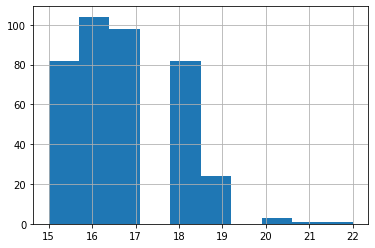

In [14]:
# Столбец age:
# Рассмотрим столбец age: построим график распределения, посчитаем IQR, проверим есть ли выбросы:
analiz('age')

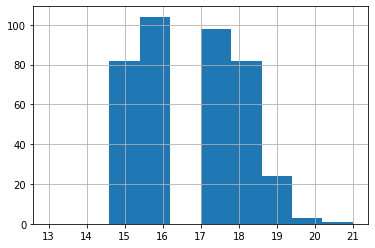

In [15]:

# Построит распределение без выбросов:
func_IQR('age')

In [16]:
# По столбцу age можно сделать вывод, что половина исследуемых учеников находилась в возрасте от 16 до 18 лет
# Медианное значение возраста  17 лет
# Видимо экзамен дети сдают начиная с 15 лет, так как это минимальный возраст
# Распределение нормальное, медиана практически равна среднеарифметическому.

25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0].


(count    392.000000
 mean       2.750000
 std        1.098127
 min        0.000000
 25%        2.000000
 50%        3.000000
 75%        4.000000
 max        4.000000
 Name: Medu, dtype: float64,
 <matplotlib.axes._subplots.AxesSubplot at 0x26a9e43ddc0>)

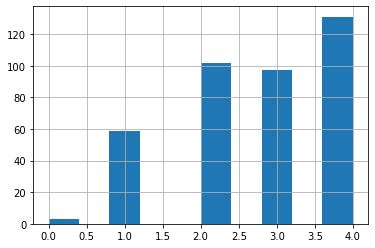

In [17]:
# Столбец Medu (образование матери):
# Мы уже посмотрели, что там есть 3 значения nan, 
# Построим распределение:
analiz('Medu')

In [18]:
# Заменим nan на
# Распределение бимодальное,симметричное, медиана и среднее близки по значению, выбросов нет
# Заменим nan  на медиану. В принципе на модель это почти не повлияет из-за малого количества nan
stud['Medu'].fillna(stud.Medu.median(), inplace=True)
# Можно сделать вывод, что в целом много образованных матерей среднее и выше,
# причем или учатся до 9 класса, потом рожают, или идут на высшее, среднего специальнгого поменьше

25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5].


(count    395.000000
 mean       2.486076
 std        1.062362
 min        0.000000
 25%        2.000000
 50%        2.000000
 75%        3.000000
 max        4.000000
 Name: Fedu, dtype: float64,
 <matplotlib.axes._subplots.AxesSubplot at 0x26a9e4d2670>)

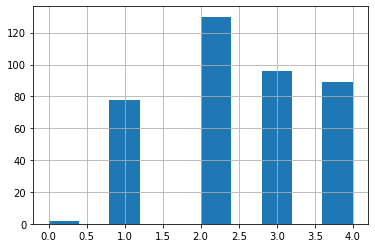

In [19]:
# Столбец Fedu(образование отца):
# В столбце 24 значения nan,и одно значение 40 при диапазоне 0-4, явная опечатка,
# Заменим на 4
stud['Fedu'] = stud['Fedu'].replace(40, 4)
# Заменим nan  на медиану:
stud['Fedu'].fillna(stud.Fedu.median(), inplace=True)
# Построим распределение:
analiz('Fedu')

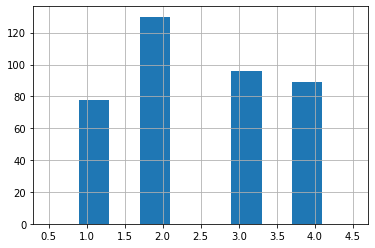

In [20]:
# Построим распределение без выбросов:
func_IQR('Fedu')
# Из графика видно, что распределение нормальное, среднее больше медианы
# Доля отцов со среднешколным образованием больше чем у матерей

25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].


(count    395.000000
 mean       1.407595
 std        0.678490
 min        1.000000
 25%        1.000000
 50%        1.000000
 75%        2.000000
 max        4.000000
 Name: traveltime, dtype: float64,
 <matplotlib.axes._subplots.AxesSubplot at 0x26a9e5c3760>)

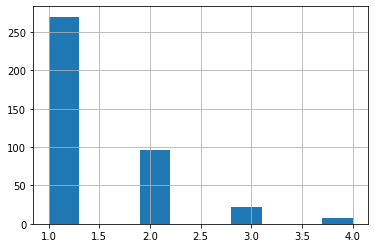

In [21]:
# Столбец traveltime(время пути до школы):
# В столбце  28 nan, заменим на 1(<15 мин), так как из опыта знаем, что школа чаще всего находится рядом с домом
stud['traveltime'].fillna(1, inplace=True)
# Построим распределение:
analiz('traveltime')

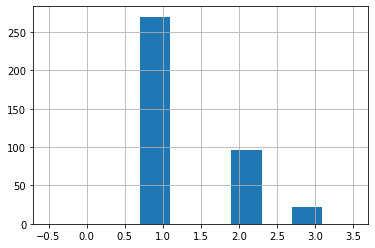

In [22]:
# Из графика видно, что распределение нормальное, с отклонением вправо, среднее больше медианы
# Выбросы 4, таких значений всего 7 , построим график без выбросов:
func_IQR('traveltime')

In [23]:
# Большая часть школьников живет в 15 мин от школы

25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].


(count    395.000000
 mean       2.037975
 std        0.834580
 min        1.000000
 25%        1.000000
 50%        2.000000
 75%        2.000000
 max        4.000000
 Name: studytime, dtype: float64,
 <matplotlib.axes._subplots.AxesSubplot at 0x26a9e446280>)

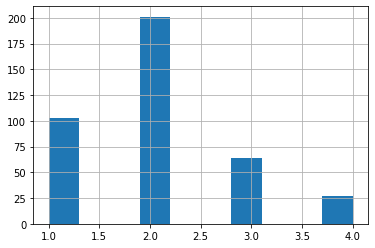

In [24]:
# Столбец studytime:
# В столбце  7 nan, заменим на 2,  раз уж у нас 193 ответа 2(2-5 часов в неделю), из-за небольшого
# количество nan ощутимо на распределение не повлияет:
stud['studytime'].fillna(2, inplace=True)
# Построим распределение:
analiz('studytime')

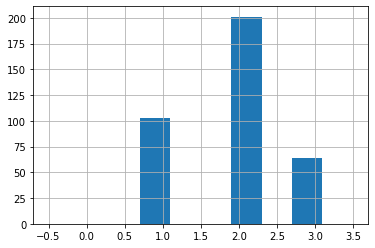

In [25]:
# Из графика видно, что распределение нормальное, с отклонением вправо, среднее больше медианы
# Выбросы 4, таких значений 27 , построим график без выбросов:
func_IQR('studytime')

In [26]:
# Столбец failures:
# Предлагаю отбросить. 293 значения заполнены нулями. 0 - неинформативный ответ, были неудачи, много или не было вообще.

25-й перцентиль: 4.0, 75-й перцентиль: 4.5, IQR: 0.5,  Границы выбросов: [3.25, 5.25].


(count    395.000000
 mean       3.946835
 std        0.872425
 min        1.000000
 25%        4.000000
 50%        4.000000
 75%        4.500000
 max        5.000000
 Name: famrel, dtype: float64,
 <matplotlib.axes._subplots.AxesSubplot at 0x26a9e7ab880>)

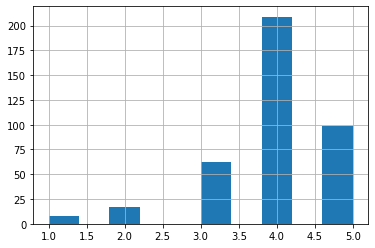

In [27]:
# Столбец famrel(Семейные отношения):
# При вариантах ответа 1...5, есть один ответ -1, либо описка, либо там в семье вообще все плохо,
# В любом случае заменим его на 1 так как скорее всего -1 это опечатка
stud['famrel'] = stud['famrel'].replace(-1, 1)
# Предлагаю заменить 27 nan на значение 4 , так как это наиболее часто встречающееся значение
stud['famrel'].fillna(4, inplace=True)
# Построим распределение:
analiz('famrel')

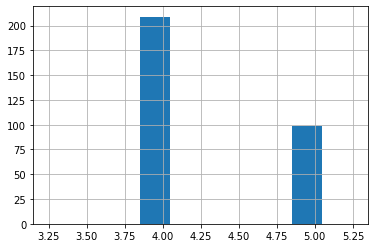

In [28]:
# Есть выбросы,   построим график без выбросов:
func_IQR('famrel')
# Распределение нормальное, с отколнением влево, среднее меньше медианы.
# В большинстве семей отношения на 4 и 5

In [29]:
#stud['famrel'].value_counts()

25-й перцентиль: 3.0, 75-й перцентиль: 4.0, IQR: 1.0,  Границы выбросов: [1.5, 5.5].


(count    395.000000
 mean       3.225316
 std        0.980711
 min        1.000000
 25%        3.000000
 50%        3.000000
 75%        4.000000
 max        5.000000
 Name: freetime, dtype: float64,
 <matplotlib.axes._subplots.AxesSubplot at 0x26a9e73a3a0>)

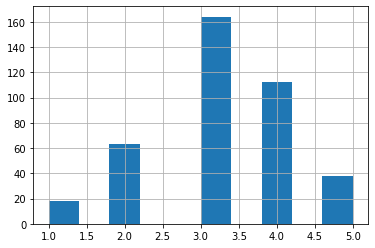

In [30]:
# Столбец freetime(свободное время после школы):
# В столбце 11 незаполненных значений, предлагаю заменить их на медиану =3  так ка среднее не целое чило, а в столбце только целые:
stud['freetime'].fillna(stud.freetime.median(), inplace=True)
# Построим распределение
analiz('freetime')

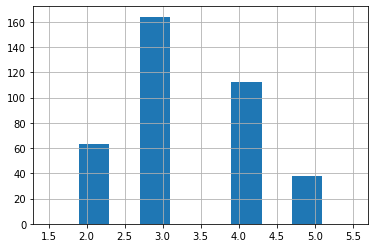

In [31]:
# У нас есть выбросы <1.5, построим распределение без выбросов:
func_IQR('freetime')

In [32]:
# Распределение нормальное со смещением вправо, среднее больше медианы
# Большая часть учеников имеет среднее количество свободного времени.
# Столбец скорее не числовой, а качественный

25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0].


(count    395.000000
 mean       3.103797
 std        1.104610
 min        1.000000
 25%        2.000000
 50%        3.000000
 75%        4.000000
 max        5.000000
 Name: goout, dtype: float64,
 <matplotlib.axes._subplots.AxesSubplot at 0x26a9e44e7c0>)

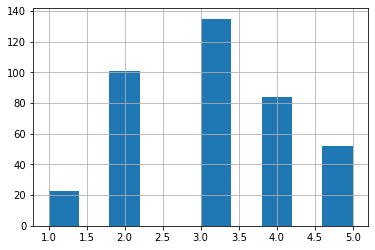

In [33]:
# Столбец goout(проведение времени с друзьями):
# В столбце 8 незаполненных значений, так же заменим их на медиану:
stud['goout'].fillna(stud.goout.median(), inplace=True)
# Построим распределение
analiz('goout')

In [34]:
# Распределение нормальное со смещением вправо, выбросов нет,среднее больше медианы
# Большинство учеников проводили много времени с друзьями

25-й перцентиль: 3.0, 75-й перцентиль: 5.0, IQR: 2.0,  Границы выбросов: [0.0, 8.0].


(count    395.000000
 mean       3.549367
 std        1.372118
 min        1.000000
 25%        3.000000
 50%        4.000000
 75%        5.000000
 max        5.000000
 Name: health, dtype: float64,
 <matplotlib.axes._subplots.AxesSubplot at 0x26a9e5231f0>)

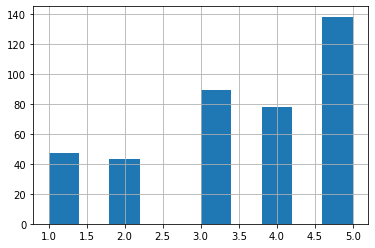

In [35]:
# Столбец health:
# В столбце 15 незаполненных значений, так же заменим их на медиану:
stud['health'].fillna(stud.health.median(), inplace=True)
# Построим распределение
analiz('health')

In [36]:
# Распределение бимодальное, выбросов нет
# Есть две преобладающие группы учеников, со средним и с отличным здоровьем


25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


(count    395.000000
 mean       7.179747
 std       23.111967
 min        0.000000
 25%        0.000000
 50%        4.000000
 75%        8.000000
 max      385.000000
 Name: absences, dtype: float64,
 <matplotlib.axes._subplots.AxesSubplot at 0x26a9e893250>)

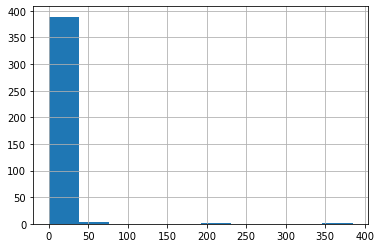

In [37]:
# Столбец absences ( количество пропущенных занятий):
# В столбце 12 незаполненных значений, так же заменим их на медиану:
stud['absences'].fillna(stud.absences.median(), inplace=True)
# Построим распределение
analiz('absences')

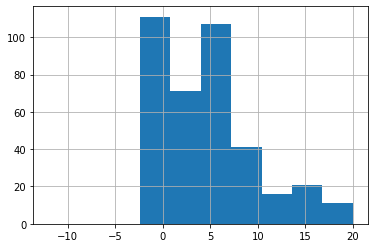

In [38]:
# У нас есть выбросы >20, построим распределение без выбросов:
func_IQR('absences')

In [39]:
# Распределение бимодальное смещеное вправо, среднее больше медианы, большая часть учеников имеет до 20 пропусков
# Есть 2 ученика с большим количеством пропусков 212 и 385, интересно посмотреть как они по здороью, или просто прогульщики
#  Так же интересно их балл по экзамену

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


(count    395.000000
 mean      52.303797
 std       22.746314
 min        0.000000
 25%       40.000000
 50%       55.000000
 75%       70.000000
 max      100.000000
 Name: score, dtype: float64,
 <matplotlib.axes._subplots.AxesSubplot at 0x26a9e989970>)

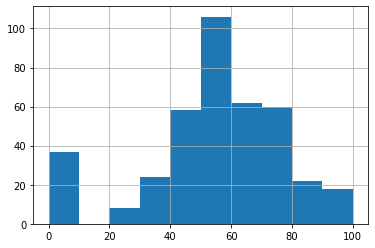

In [40]:
# Столбец score:
#  В столбце 6 назаполненных значений, заменим их на медиану:
stud['score'].fillna(stud.score.median(), inplace=True)
# Построим распределение
analiz('score')

In [41]:
# У нас есть 37 учеников с результатом 0, скорее всего это ученики, которые не пришли на экзамен или их дисквалифицировали
# Если рассматривать график без 0 значений, то это нормальное распределение, со сдвигом медиана больше среднего

In [42]:
# Проведем корреляционнны анализ числовых столбцов.
#  Без столбцов: 'studytime, granular','failures'
stud1 = stud.drop(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
                   'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
                   'nursery', 'higher', 'internet', 'romantic', 'studytime, granular', 'failures'], axis=1)
stud1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         395 non-null    int64  
 1   Medu        395 non-null    float64
 2   Fedu        395 non-null    float64
 3   traveltime  395 non-null    float64
 4   studytime   395 non-null    float64
 5   famrel      395 non-null    float64
 6   freetime    395 non-null    float64
 7   goout       395 non-null    float64
 8   health      395 non-null    float64
 9   absences    395 non-null    float64
 10  score       395 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 34.1 KB


In [43]:
stud1.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'famrel', 'freetime',
       'goout', 'health', 'absences', 'score'],
      dtype='object')

In [44]:
# Посмотрим корреляцию выбранных столбцов:
stud1.corr()

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,health,absences,score
age,1.000000,-0.161375,-0.154781,0.084755,-0.015355,0.065250,0.026443,0.134069,-0.063892,0.091531,-0.151150
Medu,-0.161375,1.000000,0.593116,-0.160877,0.077050,-0.013853,0.026210,0.063361,-0.050991,-0.010979,0.205568
Fedu,-0.154781,0.593116,1.000000,-0.120629,0.007754,-0.024077,-0.029868,0.039084,0.006132,0.021345,0.122642
traveltime,0.084755,-0.160877,-0.120629,1.000000,-0.094637,-0.019040,-0.012496,0.051775,-0.044842,-0.038511,-0.055243
studytime,-0.015355,0.077050,0.007754,-0.094637,1.000000,0.037638,-0.119014,-0.051090,-0.073674,-0.025619,0.114371
famrel,0.065250,-0.013853,-0.024077,-0.019040,0.037638,1.000000,0.165324,0.074217,0.085947,-0.079959,0.053510
freetime,0.026443,0.026210,-0.029868,-0.012496,-0.119014,0.165324,1.000000,0.292305,0.060557,0.006943,0.018200
goout,0.134069,0.063361,0.039084,0.051775,-0.051090,0.074217,0.292305,1.000000,-0.014274,-0.049745,-0.125708
health,-0.063892,-0.050991,0.006132,-0.044842,-0.073674,0.085947,0.060557,-0.014274,1.000000,-0.017368,-0.072776
absences,0.091531,-0.010979,0.021345,-0.038511,-0.025619,-0.079959,0.006943,-0.049745,-0.017368,1.000000,0.062383


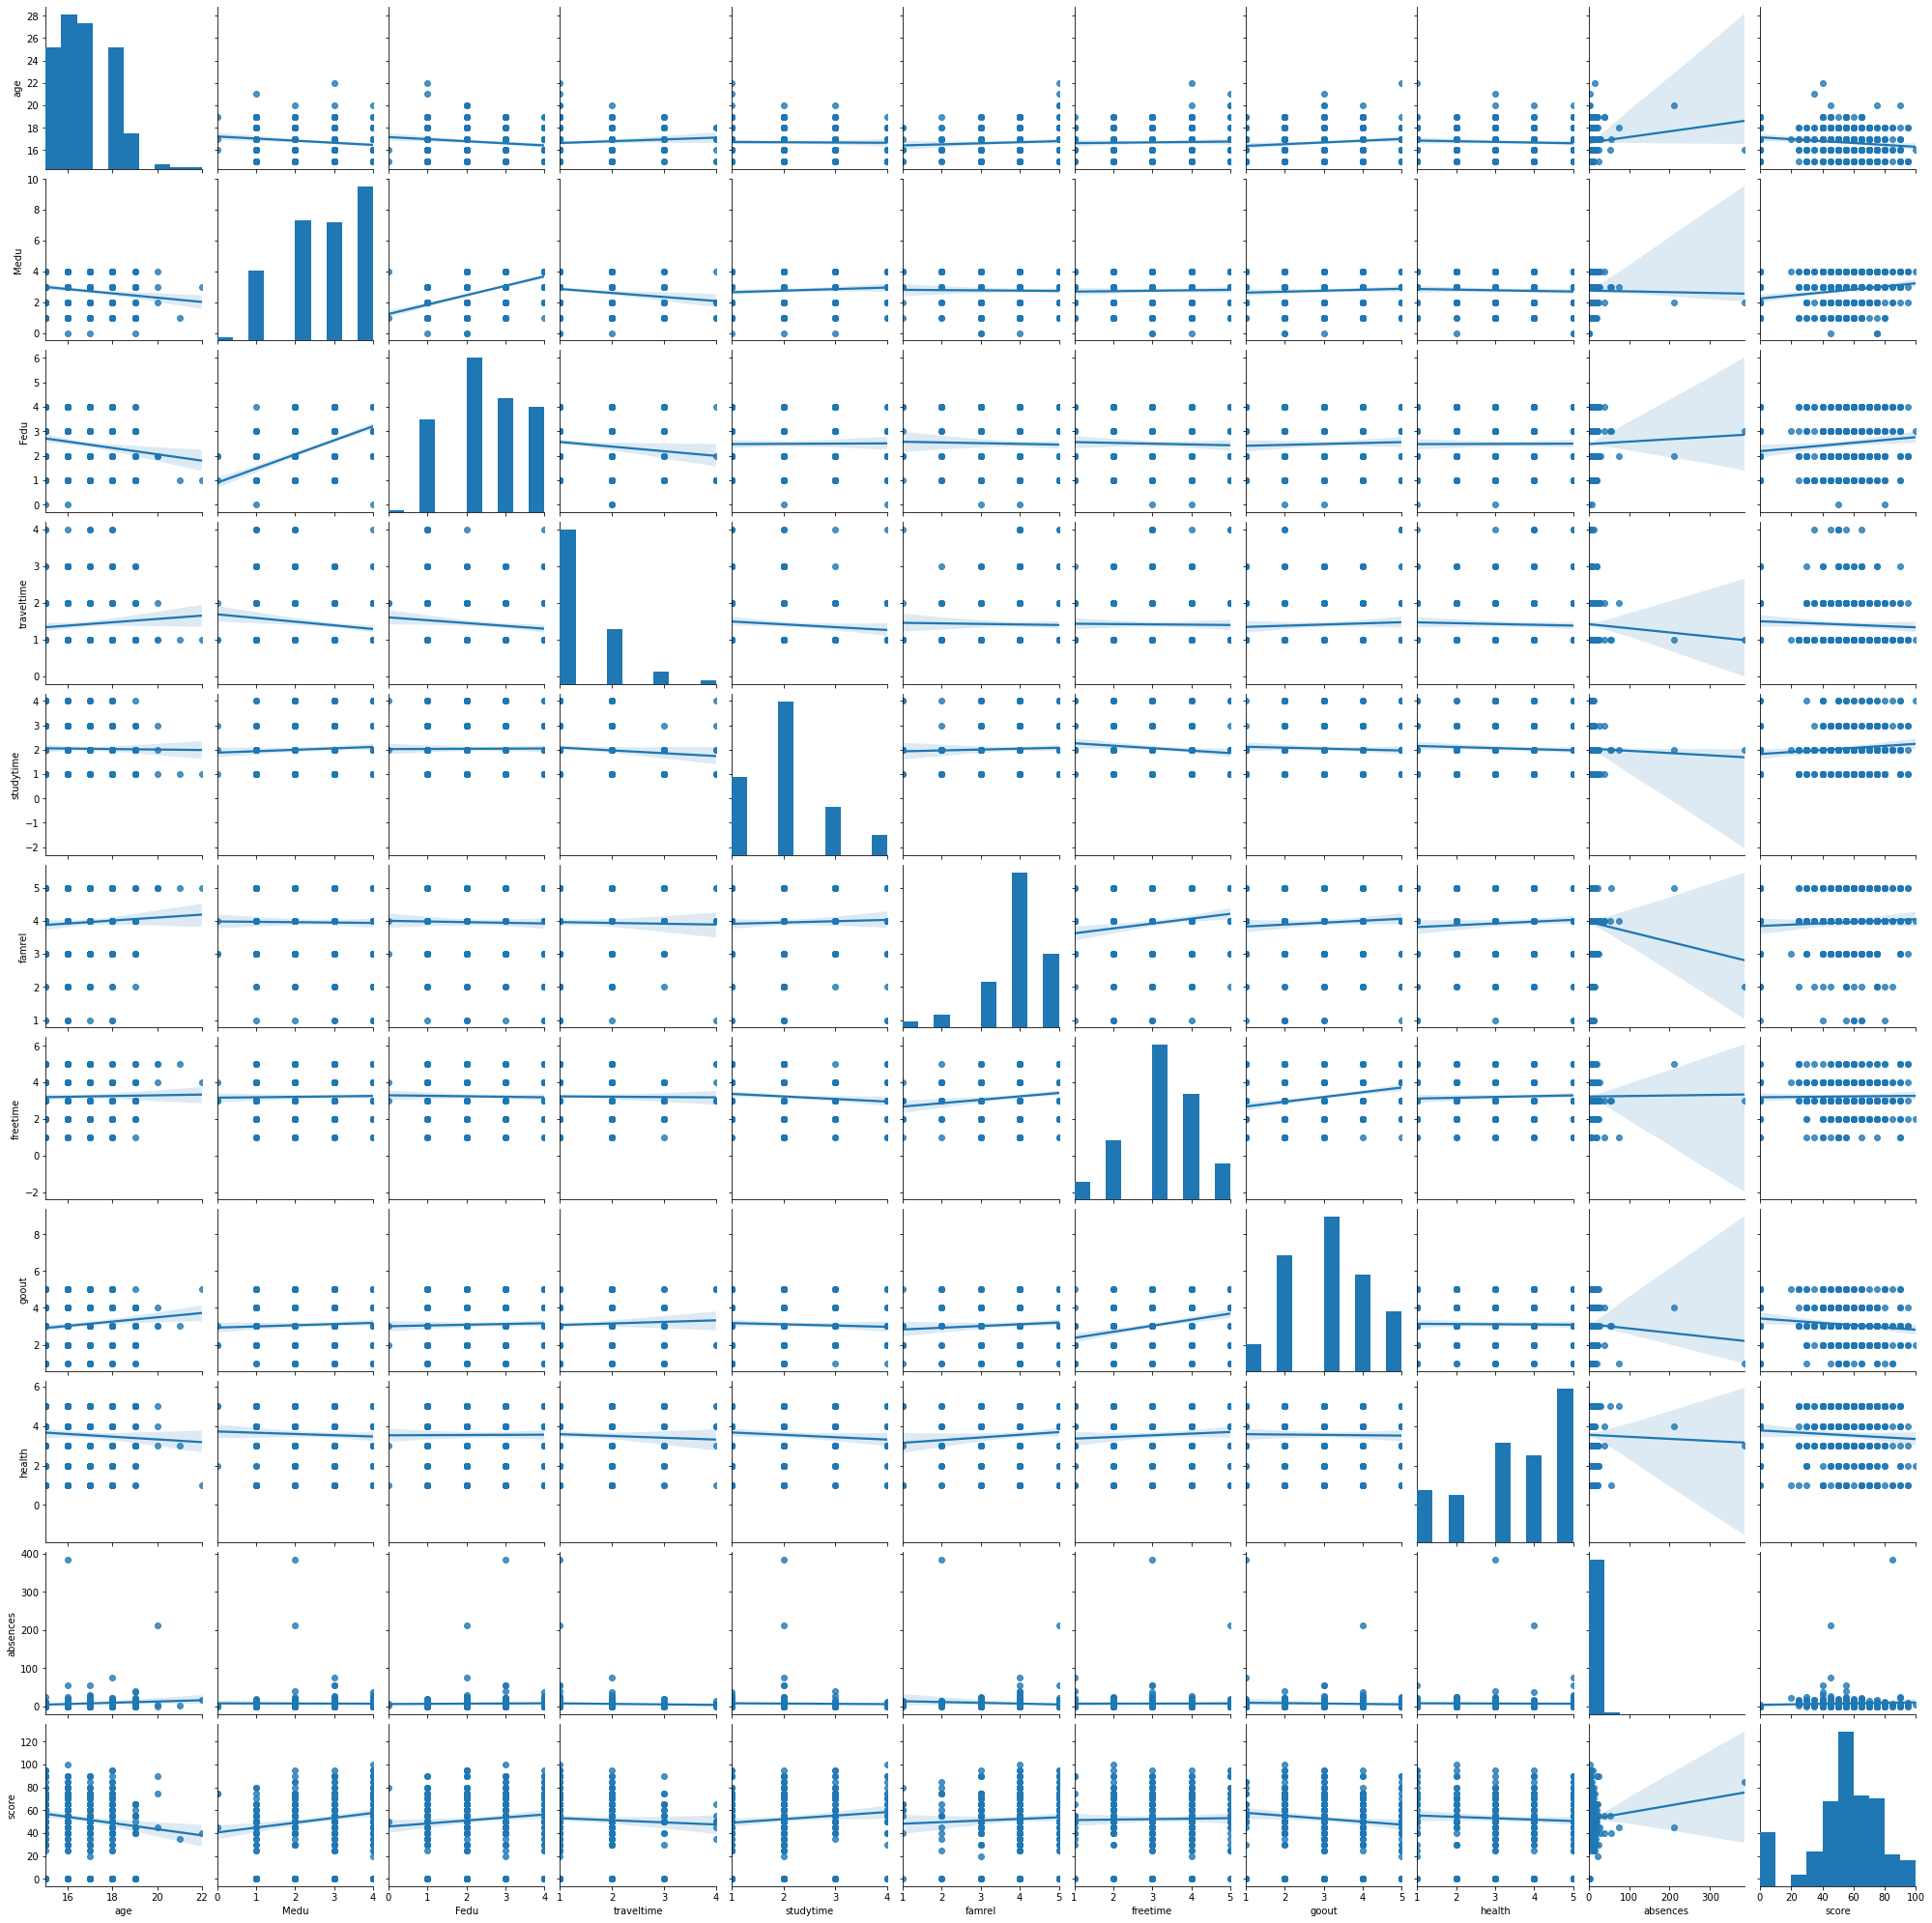

In [45]:
# Построим графики:
sns.pairplot(stud1, kind='reg')

In [46]:
# Из таблицы коррелляции и построенных графиков, я делаю вывод, что со столбцом score:

#  столбцы: 'age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'goout', 'health' коррелируют в большей мере

#  столбцы  'famrel', 'freetime', 'score','absences' оценка за экзамен с этими столбцами коррелирует очень слабо

  


In [47]:
# Номинативные переменные:


# Выделим столбцы с номинативными переменными в отдельный DataFrame
nominative = ['object']
obj_stud = stud.select_dtypes(include=nominative)
obj_stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   address     378 non-null    object
 3   famsize     368 non-null    object
 4   Pstatus     350 non-null    object
 5   Mjob        376 non-null    object
 6   Fjob        359 non-null    object
 7   reason      378 non-null    object
 8   guardian    364 non-null    object
 9   schoolsup   386 non-null    object
 10  famsup      356 non-null    object
 11  paid        355 non-null    object
 12  activities  381 non-null    object
 13  nursery     379 non-null    object
 14  higher      375 non-null    object
 15  internet    361 non-null    object
 16  romantic    364 non-null    object
dtypes: object(17)
memory usage: 52.6+ KB


In [48]:
obj_stud.columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [49]:
#Проверим каие уникальные значения присутствуют в каждой номинтаивной колонке  (на предмет пустых,незаполненных, испорченных значений)
unic(obj_stud)

school ['GP' 'MS']


In [50]:
#  Только колонки school и sex не содержат пропусков nan

In [51]:
# Посмотрим количество незаполненных значений в каждом числовом столбце и количество уникальных значений во всех столбцах:
spread(obj_stud)

    school
GP     349
MS      46 nan = 0
   sex
F  208
M  187 nan = 0
   address
U      295
R       83 nan = 17
     famsize
GT3      261
LE3      107 nan = 27
   Pstatus
T      314
A       36 nan = 45
          Mjob
other      133
services    98
at_home     58
teacher     55
health      32 nan = 19
          Fjob
other      197
services   102
teacher     29
at_home     16
health      15 nan = 36
            reason
course         137
home           104
reputation     103
other           34 nan = 17
        guardian
mother       250
father        86
other         28 nan = 31
     schoolsup
no         335
yes         51 nan = 9
     famsup
yes     219
no      137 nan = 39
     paid
no    200
yes   155 nan = 40
     activities
yes         195
no          186 nan = 14
     nursery
yes      300
no        79 nan = 16
     higher
yes     356
no       19 nan = 20
     internet
yes       305
no         56 nan = 34
     romantic
no        240
yes       124 nan = 31


In [52]:
# Количество  nan  в колонках <20%, можно судить о том что данные хорошего качества.
#  В столбцах Mjob  и Fjob  наиболее часто встречающееся значение "other",  значит столбцы неинформативны для дальнейшего анализа
stud.Fjob.describe()

count       359
unique        5
top       other
freq        197
Name: Fjob, dtype: object

In [53]:
# В наборе номинативных столбцов небольшое количество уникальных значений, от 2 до 5.
# Можно заменить незаполненные значения тем значением, которое наиболее часто встречается в столбцах:
for col in obj_stud:
    obj_stud[col].fillna(obj_stud[col].value_counts().index[0], inplace=True)

C:\Users\Anna\Skillfactory\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [54]:
#  Сделаем то же самое и для основной таблицы:
for col in obj_stud:
    stud[col].fillna(obj_stud[col].value_counts().index[0], inplace=True)

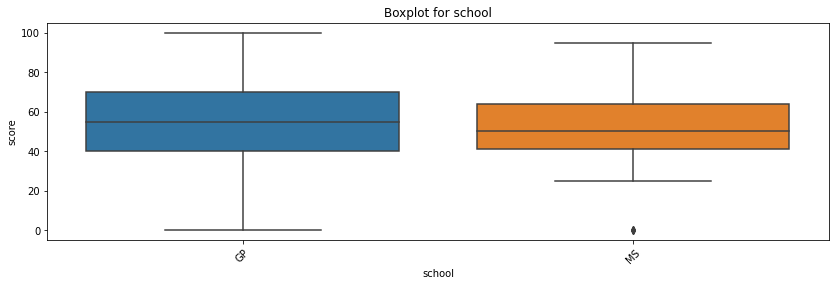

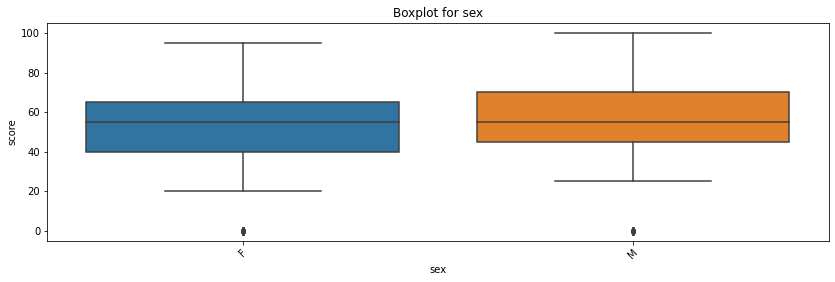

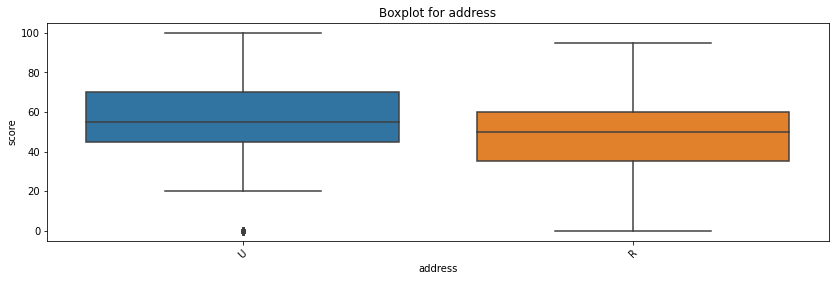

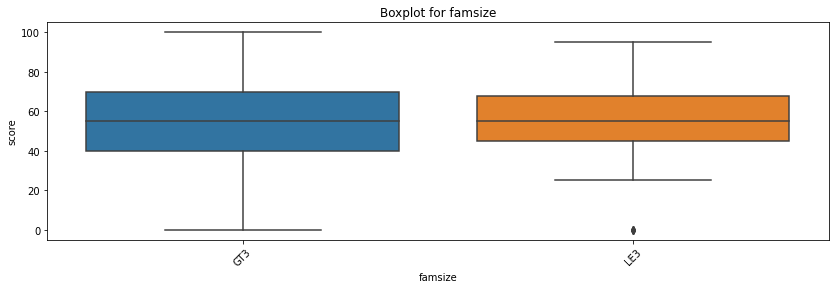

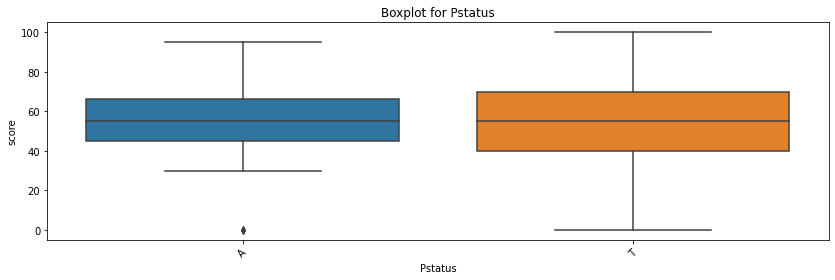

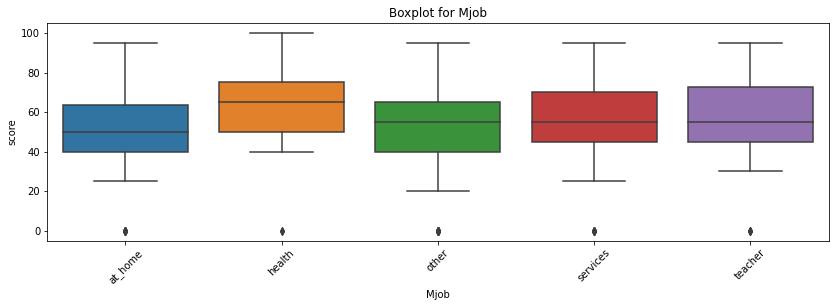

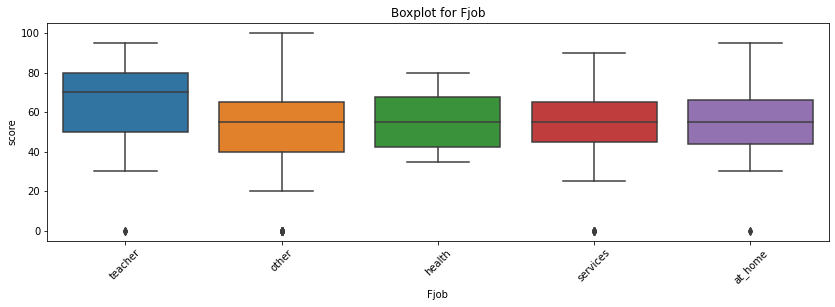

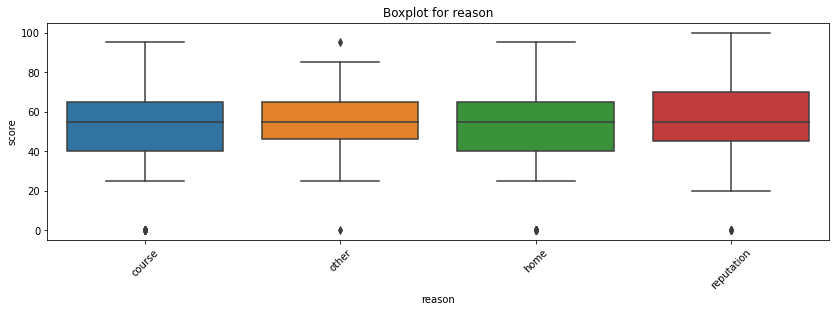

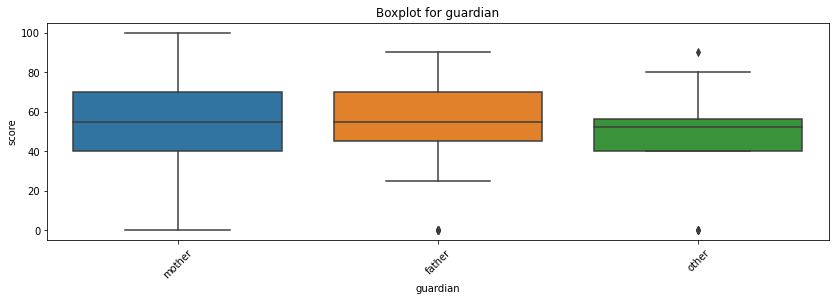

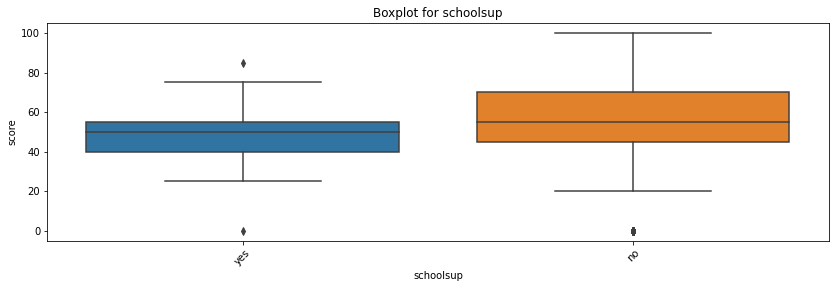

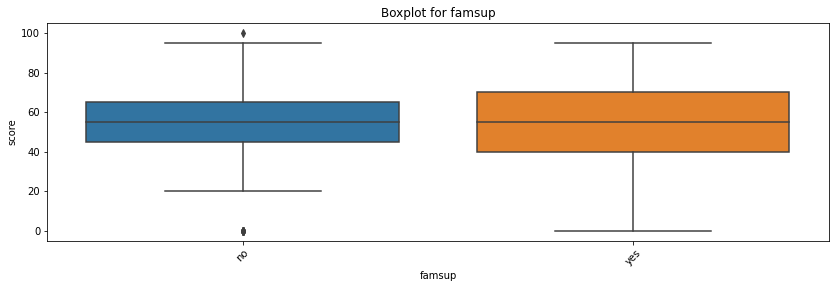

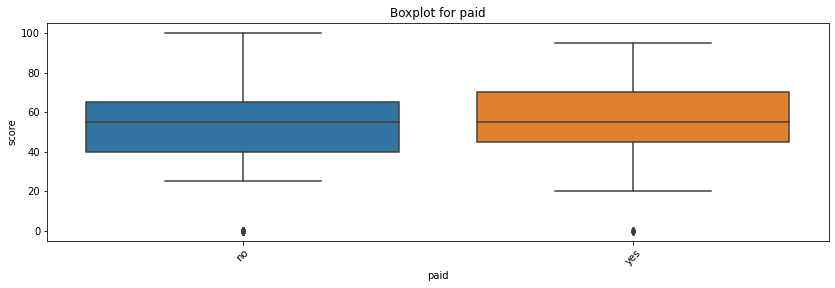

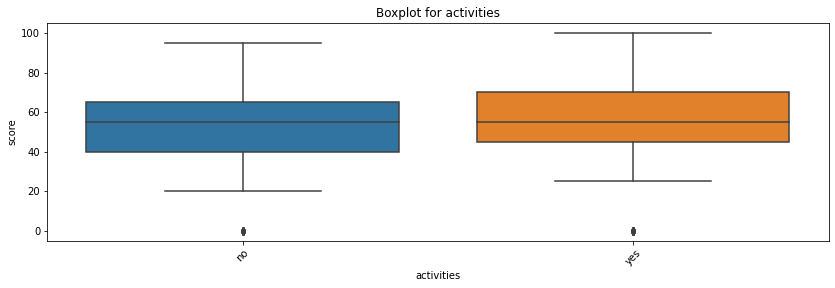

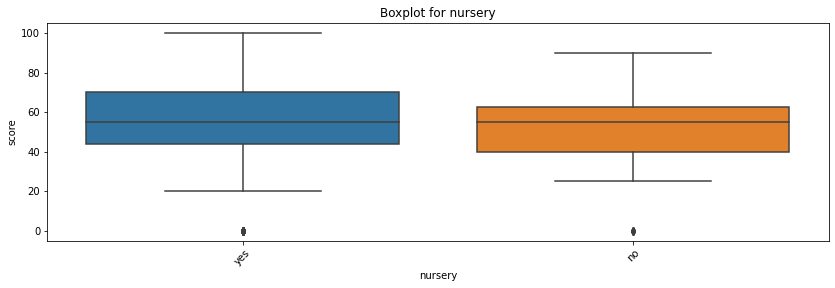

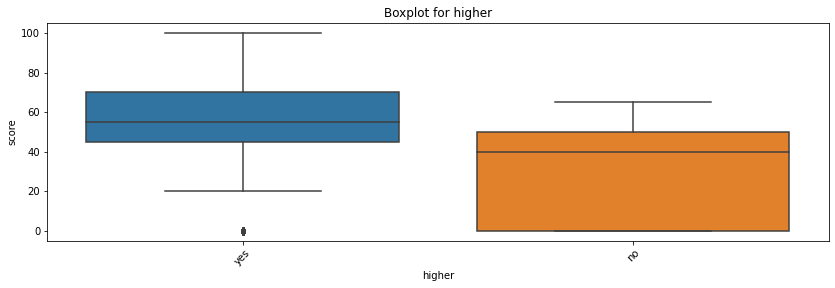

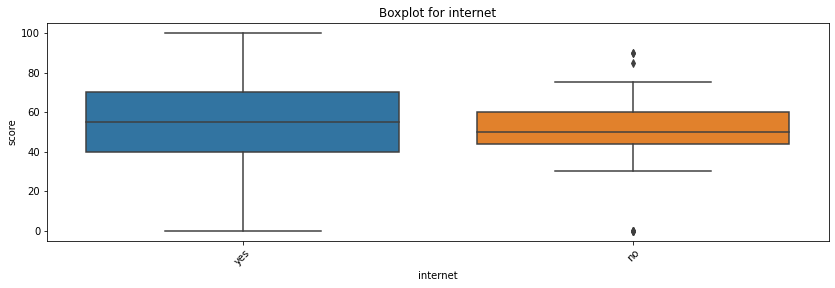

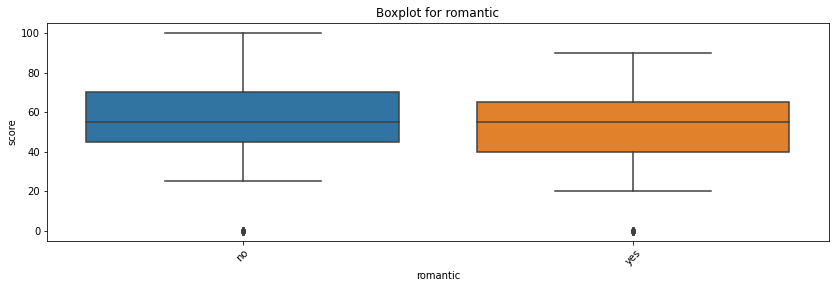

In [55]:
# Построим графики  boxplot для номинативных столбцов:
for col in obj_stud.columns:
    get_boxplot(col)

In [56]:
# Выводы по графикам:

# Столбец school: В школе GP есть некоторое количество детей, которые сдали экзамен лучше чем в MS. Учитывая, что в выборке гораздо
# больше детей из GP GP/MS = 349/46

# Столбец school: Мальчики чуть лучше сдают экзамен, хотя медианы близки по значению

# Столбец address: Городские дети лучше сдают экзамен

# Столбец famsize: В многодетных семьях больше разброс по оценкам, видимо в одних дисциплина хорошая,
#в других дети предоставлены сами себе.

# Столбец Pstatus: Где дети живут раздельно, меньше низких оценок, видимо говорит об ответственности отдельно живущих детей

# Столбец Mjob: Оценки лучше у детей, чьи матери заняты в сфере медицины ( если не учитывать,
#что в столбце много неинформативных ответов other)

# Столбец Fjob: Оценки лучше у детей, чьи отцы учителя ( если не учитывать, что в столбце много неинформативных ответов other)

# Столбец reason: Оценки лучше у детей, которые выбрали школу по ее репутации.

# Столбец guardian: Меньше низких оценок у детей, чьи опекуны отцы( видимо отцы строже)

# Столбец schoolsup: Оценки лучше у детей, где не было дополнительной образовательной поддержки.
#Странно, видимо она бестолковая, и только отнимает время.

# Столбец famsup: Итересно, где родители учат детей, там есть как более высокие оценки за экзамен, так и более низкие.
#Либо часть родителей учат неправильно, либо родители занимаются с совсем уж отстающими детьми,
#но это приносит минимальный результат.

# Столбец paid: У детей, которые дополнительно платно занимались по математике  в целом меньше плохих отметок,
# но высоких баллов не больше чем у тех, кто не занимался платно.

# Столбец activities: Оценки лучше у детей, которые посещали дополнительные внеучебные занятия.

# Столбец nursery: Оценки лучше у детей, которые посещали детский сад. Интересно,
# наверное больше приучены к регулярному графику занятий.

# Столбец higher: Оценки лучше у детей, которые хотят получить высшее образование. Мотивация очень важна.


# Столбец internet: Оценки лучше у детей, у которых был доступ в интеренет. Видимо, дети не только развлекались,
# но и получали оттуда знания дополнительно.

# Столбец romantic: Оценки лучше у детей, кто не отвлекался на романтические отношения, или наоброт,
# у ботанов не было романтических отношений.




In [57]:
# Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента.
# Проверим нулевую гипотезу о том, что распределения оценок учеников по различным параметрам неразличимы:
for col in obj_stud.columns:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


In [58]:
# Как мы видим, серьёзно отличаются четыре параметра: address,  Mjob,higher и  romantic.
# Но столбец Mjob  неинформативен из-за большого количества 'other'.
# Я бы оставил следующие переменные: address,  higher и  romantic в датасете для дальнейшего построения модели.

In [59]:
# Можно удалить все выбросы в проанализированных числовых столбцах:
#  Но в столбце 'absences' их так много что мы лишимся около 30% данных

#stud = stud[stud['age']<=21]
#stud = stud[stud['Fedu']>=0.5]
#stud = stud[stud['traveltime']<=3.5]
#stud = stud[stud['studytime']<=3.5]
#stud = stud[stud['famrel']>=3.25]
#stud = stud[stud['freetime']>=1.5]
#stud = stud[stud['absences']<=20]

In [60]:
# Построим итоговый датасет:
stud_for_model = stud.loc[:, ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'famrel', 'freetime', 'goout', 'health',
                              'absences', 'score', 'address', 'higher', 'romantic']]
stud_for_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         395 non-null    int64  
 1   Medu        395 non-null    float64
 2   Fedu        395 non-null    float64
 3   traveltime  395 non-null    float64
 4   studytime   395 non-null    float64
 5   famrel      395 non-null    float64
 6   freetime    395 non-null    float64
 7   goout       395 non-null    float64
 8   health      395 non-null    float64
 9   absences    395 non-null    float64
 10  score       395 non-null    float64
 11  address     395 non-null    object 
 12  higher      395 non-null    object 
 13  romantic    395 non-null    object 
dtypes: float64(10), int64(1), object(3)
memory usage: 43.3+ KB


In [61]:
# Общие выводы:

# Данные хорошего качества. 3 столбца school,sex,age полностью заполнены. В остальных столбцах nan  в небольшом количестве.
# Возможно заполнить пустые значения, я заполнил в большинстве случаев медианой.
# В ряде столбцов исправлены опечатки или неправильно заполненные значения.
# Избавились от столбца "studytime, granular", так как он полностью коррелирует с столбцом
#  "stutytime". Можно заметить что: "studytime, granular" = (-3)*"studytime"
# Так же удалили столбец "failures" так как большинство значений в нем 0, что соответствует любому количеству,
# кроме  промежутка[1:3]
# В численных столбцах нашли выбросы построили графики распределения и графики коррелляции значений
#  столбцы: 'age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'goout', 'health' коррелируют в большей мере
#  столбцы  'famrel', 'freetime', 'score','absences' оценка за экзамен с этими столбцами коррелирует очень слабо
# В столбцах с номинативными переменными уникальное количество значений от 2 до 5
# В столбцах Mjob  и Fjob  наиболее часто встречающееся значение "other",  значит столбцы неинформативны для дальнейшего анализа
# Построили графики boxplot  для номинативных переменных ( анализ графиков выше)
# При помощи теста Стьюдента выделили столбцы со значимими статичтическими различиями для колонки score:
# address,  Mjob,higher и  romantic.
# Но столбец Mjob  неинформативен из-за большого количества значений 'other'.


# В ходе работы мы избавились от пустых значений в данных, исправили некоторые ошибки ввода.
# Убрали неинформативные для нас столбцы и подготовили данные для дальнейшего построения модели.